Задание 01

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и Y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
from keras.datasets import boston_housing

In [11]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [12]:
X = pd.read_csv('BostonHousing.csv')
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [13]:
Y = np.vstack((y_train.reshape(-1, 1), y_test.reshape(-1, 1)))
Y = pd.DataFrame(Y, columns=['price'])
Y

,price
0,15.2
1,42.3
2,50.0
3,21.1
4,17.7
...,...
501,21.9
502,24.1
503,50.0
504,26.7


---

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

---

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
X_train_scaled = scaler.fit_transform(X_train)

In [19]:
X_test_scaled = scaler.transform(X_test)

---

In [20]:
from sklearn.manifold import TSNE

In [21]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [22]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

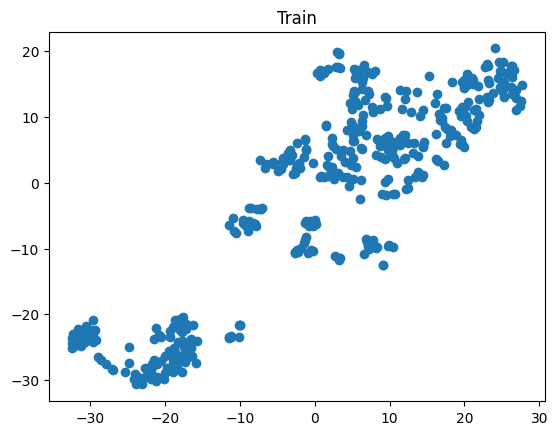

In [23]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.title('Train')
plt.show()

Задание 02

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [24]:
from sklearn.cluster import KMeans

In [25]:
model = KMeans(n_clusters=3, max_iter=100,random_state=42)

In [29]:
X_train_labels = model.fit_predict(X_train_scaled)
X_train_labels

array([0, 2, 1, 0, 2, 2, 2, 1, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 0, 2,
       1, 2, 1, 2, 0, 1, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1, 1, 2, 0, 2,
       0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1,
       0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2,
       0, 1, 2, 1, 1, 0, 0, 0, 1, 2, 2, 0, 0, 2, 1, 0, 0, 2, 1, 0, 1, 2,
       2, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 2,
       1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1, 1,
       0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 1, 0, 2, 0,
       0, 0, 0, 2, 2, 1, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1,
       1, 0, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1, 1, 0, 2, 2, 0, 2, 0, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 2, 2,
       0, 1, 1, 2, 0, 1, 0, 0, 0, 2, 1, 0, 2, 2, 2,

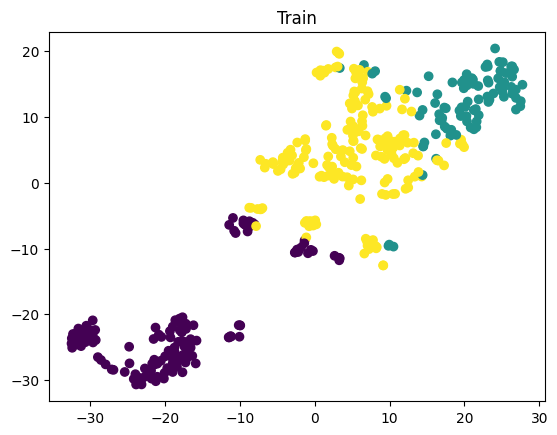

In [30]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=X_train_labels)
plt.title('Train')
plt.show()

средние значения price

In [36]:
print(y_train.loc[X_train_labels==0].mean())
print(y_train.loc[X_train_labels==1].mean())
print(y_train.loc[X_train_labels==2].mean())

price    21.813281
dtype: float64
price    21.655435
dtype: float64
price    23.545109
dtype: float64


среднее значение crim

In [37]:
print(X_train.loc[X_train_labels==0, 'crim'].mean())
print(X_train.loc[X_train_labels==1, 'crim'].mean())
print(X_train.loc[X_train_labels==2, 'crim'].mean())

10.7152190625
0.0819683695652174
0.42933271739130435
